# 선형회귀(Numpy)

> 선형 회귀는 독립 변수(x)와 종속 변수(y) 간의 선형 관계를 모델링해서 "예측"하는 통계 기법입니다

## 모델

- 단순 모델: y = ax + b
- 다중 모델: y = a1x1 + a2x2 + ... + anxn + b

## 머신러닝 활용

 - y와 x가 결정 => {a,b} 매개변수를 찾아야 함
 - y와 x가 선형 관계를 가져야 함, 이상치와 다중공선성

 ## {a,b} 매개변수를 찾아야 함!
 
 - 매개변수를 찾는 방법: 최소제곱법, 경사하강법
 - 평가는 : MSE, R^2

예제1. 어떤 회사의 연도별 매출이 광고비에 의존한다고 가정하자.
아래 데이터가 주어질 때, 광고비가 8일 때 매출을 예상하세요!

| 광고비(x) | 매출(y) |
|-------|-----|
| 2     | 81  |
| 4     | 93  |
| 6     | 91  |
| 8     | ?   |

- y = ax + b



In [20]:
import numpy as np

# 데이터 준비
X = np.array([2,4,6])
y = np.array([81, 93, 91])

# 최소제곱법(평균)
X_mean = np.mean(X)
y_mean = np.mean(y)

# 최소제곱법(계산)
# Cov(x,y) / Var(x) => a를 구하는 방법(통계)
# a = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X-X_mean)**2)
# b = y_mean - a * X_mean
X = np.column_stack([X, np.ones(len(X))])
a, b = np.linalg.lstsq(X, y)[0]

print(f"기울기: {a:.2f}, 절편 : {b:.2f}")

x_pred = 8
y_pred = a * x_pred + b
print(f"광고비(8) 예측 매출: {y_pred:.2f}")

기울기: 2.50, 절편 : 78.33
광고비(8) 예측 매출: 98.33


예제2. 어떤 회사에서 만드는 물건의 판매량이 가격과 온도에 영향을 받는다고 한다. 가격이 8이고 온도가 24일 때 판매량을 예측하세요.

| 가격(x1) | 온도(x2) | 판매량(y) |
|---------|----------|----------|
| 5 | 20 | 65 |
| 7 | 22 | 70 |
| 9 | 23 | 60 |
| 8 | 24 | ?  |

- y = a1x1 + a2x2 + b

In [29]:
import numpy as np

# 데이터 준비
X = np.array([[5,20], [7,22], [9,23]])
y = np.array([65, 70, 60])
X_bias = np.column_stack([X, np.ones(len(X))])
# 최소제곱법(계산)
coeffs = np.linalg.lstsq(X_bias, y)[0]
print(f"기울기1: {coeffs[0]:.2f}, 기울기2: {coeffs[1]:.2f}, 절편 : {coeffs[-1]:.2f}")
y_pred = np.dot([8,24,1], coeffs)
print(f"{y_pred:.2f}")

기울기1: -12.50, 기울기2: 15.00, 절편 : -172.50
87.50


## Numpy를 활용한 선형회귀 모델(v1)

> pip install scikit-learn 설치하세요

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target
# iris_df.head()

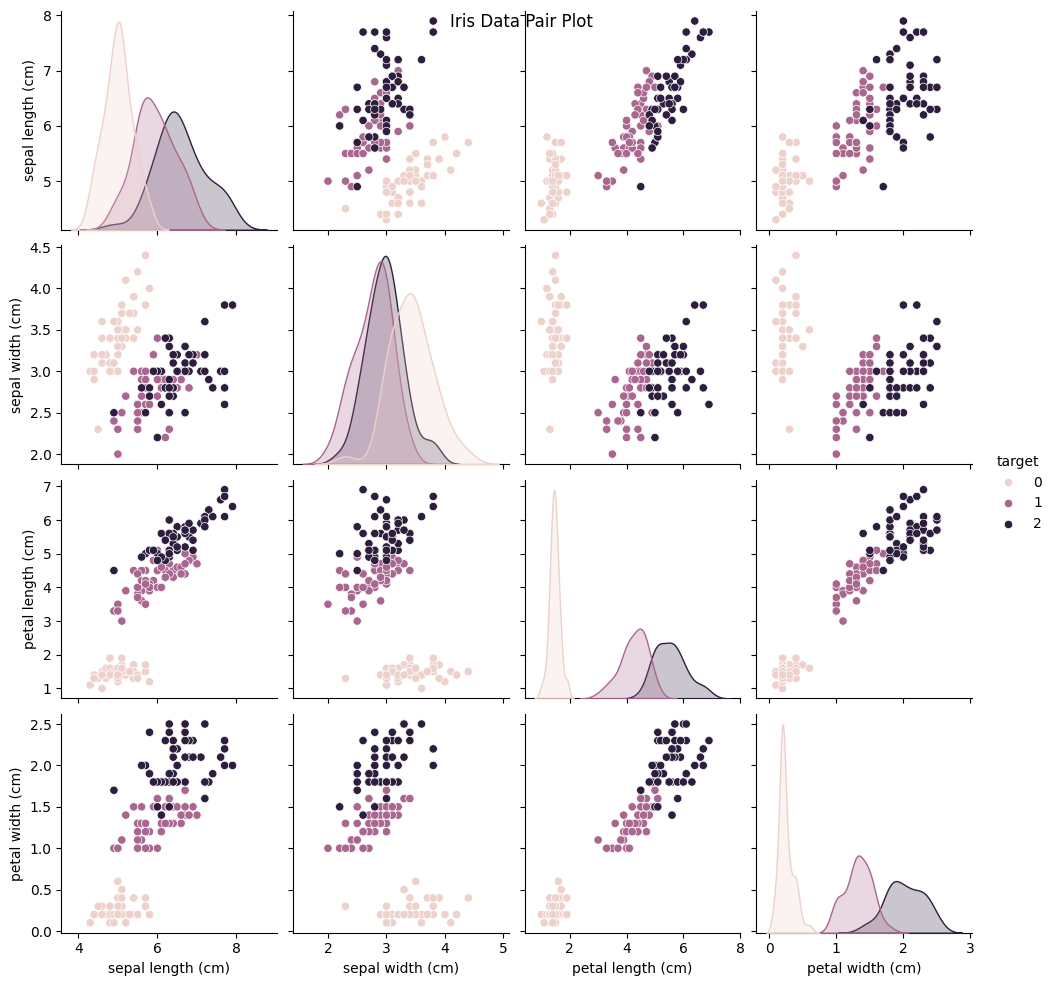

In [67]:
sns.pairplot(iris_df, hue="target")
plt.suptitle("Iris Data Pair Plot")
plt.show()

In [68]:
X = np.column_stack([iris.data[:, 0], 
                     iris.data[:, 2], 
                     iris.data[:, 3]])
y = iris.data[:, 1]
print(X.shape, y.shape)

(150, 3) (150,)


In [69]:
def custom_train_test_split(X, y, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    
    indices = np.random.permutation(len(X))
    split_idx = int(len(X) * (1 - test_size))
    train_idx = indices[:split_idx]
    test_idx = indices[split_idx:]

    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]

    return X_train, X_test, y_train, y_test

In [70]:
X_train, X_test, y_train, y_test = custom_train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 3) (45, 3) (105,) (45,)


In [71]:
def fit_linear_regreesion_lsq(X, y):
    X_bias = np.column_stack([np.ones(len(X)), X]) # 매개변수 순서!
    cofficients, _, _, _ = np.linalg.lstsq(X_bias, y)
    intercept_ = cofficients[0]
    coef_ = cofficients[1:]
    return coef_, intercept_

In [72]:
def predict_linear_regreesion_lsq(X, coef_, intercept_):
    return X @ coef_ + intercept_

In [73]:
coef_, intercept_ = fit_linear_regreesion_lsq(X_train, y_train)
y_pred_custom = predict_linear_regreesion_lsq(X_test, coef_, intercept_)

In [75]:
mse_custom = mean_squared_error(y_test, y_pred_custom)
r2_custom = r2_score(y_test, y_pred_custom)
print(mse_custom, r2_custom)

0.08472197157942186 0.38100017156758104


In [88]:
# 대응 모델()
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()
br.fit(X_train, y_train)
y_pred_br = br.predict(X_test)
mse_br = mean_squared_error(y_test, y_pred_br)
r2_br = r2_score(y_test, y_pred_br)
print(mse_br, r2_br)

0.08450878298803613 0.3825577805210957


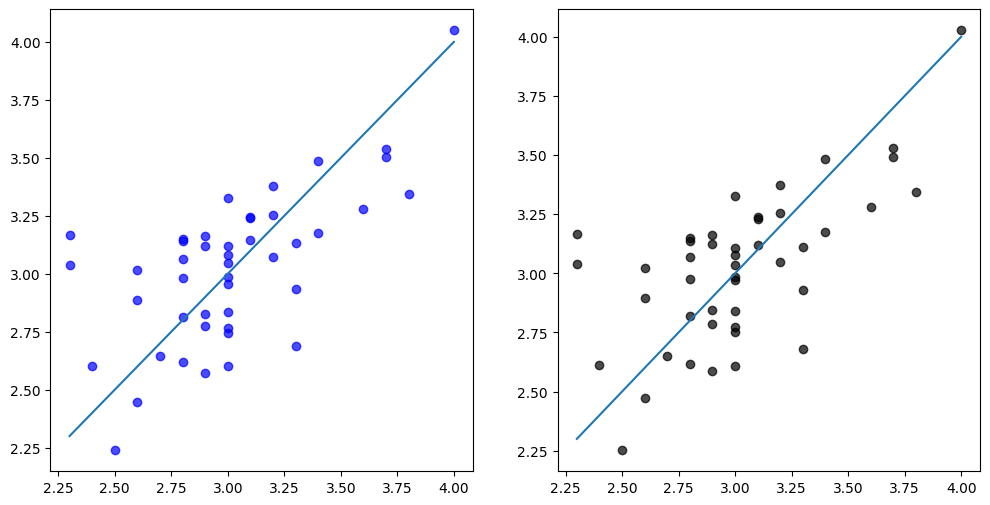

In [89]:
# TODO: seaborn으로 변경

fig, axes = plt.subplots(1,2, figsize=(12,6))
axes[0].scatter(y_test, y_pred_custom, alpha=0.7, color="blue")
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
axes[1].scatter(y_test, y_pred_br, alpha=0.7, color="black")
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])